In [27]:
import plotly.graph_objects as go
import pandas as pd

# Cadena de suministro alimentícia

Nota: La documentación de plotly para representar un diagrama de Sankey está en: https://plotly.com/python/sankey-diagram/

## Paso 1. Datos iniciales

In [ ]:
# Define data
# LISTS
origenes = ["Disponibilidad primaria", "Disponibilidad primaria", "Retail",
            "Retail", "Clientes", "Clientes", "Clientes"]
destinos = ["Retail", "Pérdidas origen/retail", "Clientes",
            "Pérdidas en retail", "Consumidor", "Incomestible", "Pérdidas consumidor"]
valores = [84, 16, 76, 8, 55, 4, 17]

# Create a list of all unique labels
labels = list(set(origenes + destinos))
print("labels", labels)

# Map labels to indices
label_indices = {label: idx for idx, label in enumerate(labels)}
print("label indices", label_indices)

# Create source and target indices
sources = [label_indices[origen] for origen in origenes]
targets = [label_indices[destino] for destino in destinos]
print(sources)

# Define Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict( # ESTA REPRESENTADO LOS NODES
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict( # ESTA REPRESENTADO LOS ARCOS
        source=sources, # un numero para cada vertice origen
        target=targets, # un numero para cada vertice destino
        value=valores
    )
))

# Update layout
fig.update_layout(
    title_text="Sankey Diagram of Flow",
    font_size=12
)

# Show diagram
fig.show()

labels ['Retail', 'Pérdidas origen/retail', 'Pérdidas en retail', 'Disponibilidad primaria', 'Incomestible', 'Pérdidas consumidor', 'Clientes', 'Consumidor']
label indices {'Retail': 0, 'Pérdidas origen/retail': 1, 'Pérdidas en retail': 2, 'Disponibilidad primaria': 3, 'Incomestible': 4, 'Pérdidas consumidor': 5, 'Clientes': 6, 'Consumidor': 7}
[3, 3, 0, 0, 6, 6, 6]


Three lists are defined:
- `origenes`: Represents the source categories or nodes in the Sankey diagram.
- `destinos`: Represents the target categories or nodes in the Sankey diagram.
- `valores`: Represents the flow values between the source and target nodes.

## Paso 2. Vamos a añadir color

In [ ]:
origenes = ["Disponibilidad primaria", "Disponibilidad primaria", "Retail",
            "Retail", "Clientes", "Clientes", "Clientes"]
destinos = ["Retail", "Pérdidas origen/retail", "Clientes",
            "Pérdidas en retail", "Consumidor", "Incomestible", "Pérdidas consumidor"]
valores = [84, 16, 76, 8, 55, 4, 17]


colores = ["green", "red", "lightgreen", "red", "lightgreen", "red", "red"]

# Create a list of all unique labels
labels = list(set(origenes + destinos))

# Map labels to indices
label_indices = {label: idx for idx, label in enumerate(labels)}

# Create source and target indices
sources = [label_indices[origen] for origen in origenes]
targets = [label_indices[destino] for destino in destinos]

# Define Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=valores,
        color=colores  # Assign colors to edges
    )
))

# Update layout
fig.update_layout(
    title_text="Sankey Diagram of Flow with Colored Edges",
    font_size=12
)

# Show diagram
fig.show()


Si los colores verde y rojo parecen demasiado fuertes, podemos usar códigos o nombres (https://community.plotly.com/t/plotly-colours-list/11730/3)

## Paso 3. Cambiemos la salida (inclyendo números)

In [ ]:
# Define data
origenes = ["Disponibilidad primaria", "Disponibilidad primaria", "Retail",
            "Retail", "Clientes", "Clientes", "Clientes"]
destinos = ["Retail", "Pérdidas origen/retail", "Clientes",
            "Pérdidas en retail", "Consumidor", "Incomestible", "Pérdidas consumidor"]
valores = [84, 16, 76, 8, 55, 4, 17]
colores = ["green", "red", "green", "red", "green", "red", "red"]

# Create a DataFrame to help with summation
df = pd.DataFrame({
    "source": origenes,
    "target": destinos,
    "value": valores
})

# Get unique labels
labels = list(set(origenes + destinos))

# Calculate sum of values entering each node
node_values = {}
for label in labels:
    inflow = df[df['target'] == label]['value'].sum()
    outflow = df[df['source'] == label]['value'].sum()
    total_value = max(inflow, outflow)  # Use max to account for either inflow or outflow as total
    node_values[label] = total_value

# Create labels with sums
labels_with_sums = [f"{label} ({node_values[label]})" for label in labels]

# Map labels to indices
label_indices = {label: idx for idx, label in enumerate(labels)}

# Create source and target indices
sources = [label_indices[origen] for origen in origenes]
targets = [label_indices[destino] for destino in destinos]

# Define Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels_with_sums
    ),
    link=dict(
        source=sources,
        target=targets,
        value=valores,
        color=colores
    )
))

# Update layout
fig.update_layout(
    title_text="Sankey Diagram with Node Labels Showing Sum of Values",
    font_size=12
)

# Show diagram
fig.show()

## Paso 4. Cambiemos los colores antes de cambiar la localización de los elementos

In [ ]:
# Define data
origenes = ["Disponibilidad primaria", "Disponibilidad primaria", "Retail",
            "Retail", "Clientes", "Clientes", "Clientes"]
destinos = ["Retail", "Pérdidas origen/retail", "Clientes",
            "Pérdidas en retail", "Consumidor", "Incomestible", "Pérdidas consumidor"]
valores = [84, 16, 76, 8, 55, 4, 17]
colores = ["green", "red", "green", "red", "green", "red", "red"]

# Create a DataFrame to help with summation
df = pd.DataFrame({
    "source": origenes,
    "target": destinos,
    "value": valores
})

# Get unique labels
labels = list(set(origenes + destinos))

# Calculate sum of values entering each node
node_values = {}
for label in labels:
    inflow = df[df['target'] == label]['value'].sum()
    outflow = df[df['source'] == label]['value'].sum()
    total_value = max(inflow, outflow)  # Use max to account for either inflow or outflow as total
    node_values[label] = total_value

# Create labels with sums
labels_with_sums = [f"{label} ({node_values[label]})" for label in labels]

# Map labels to indices
label_indices = {label: idx for idx, label in enumerate(labels)}

# Create source and target indices
sources = [label_indices[origen] for origen in origenes]
targets = [label_indices[destino] for destino in destinos]

# Define Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels_with_sums,
        color="grey"  # Nodes in black
    ),
    link=dict(
        source=sources,
        target=targets,
        value=valores,
        color=colores
    )
))

# Update layout
fig.update_layout(
    title_text="Sankey Diagram with Black Nodes and Colored Edges",
    font_size=12
)

# Show diagram
fig.show()

## Paso 5. La posición de los elementos

In [ ]:
# Define data
origenes = ["Disponibilidad primaria", "Disponibilidad primaria", "Retail",
            "Retail", "Clientes", "Clientes", "Clientes"]
destinos = ["Retail", "Pérdidas origen/retail", "Clientes",
            "Pérdidas en retail", "Consumidor", "Incomestible", "Pérdidas consumidor"]
valores = [84, 16, 76, 8, 55, 4, 17]
colores = ["green", "red", "green", "red", "green", "red", "red"]

# Create a DataFrame to help with summation
df = pd.DataFrame({
    "source": origenes,
    "target": destinos,
    "value": valores
})

# Get unique labels
labels = list(set(origenes + destinos))

# Calculate sum of values entering each node
node_values = {}
for label in labels:
    inflow = df[df['target'] == label]['value'].sum()
    outflow = df[df['source'] == label]['value'].sum()
    total_value = max(inflow, outflow)  # Use max to account for either inflow or outflow as total
    node_values[label] = total_value

# Create labels with sums
labels_with_sums = [f"{label} ({node_values[label]})" for label in labels]

# Map labels to indices
label_indices = {label: idx for idx, label in enumerate(labels)}

# Create source and target indices
sources = [label_indices[origen] for origen in origenes]
targets = [label_indices[destino] for destino in destinos]

# Define node positions (x and y coordinates between 0 and 1)
# You can adjust these values as per your layout preferences
x_positions = [0.1, 0.1, 0.5, 0.5, 0.9, 0.9, 0.9]  # Horizontal position for each node
y_positions = [0.2, 0.8, 0.2, 0.8, 0.2, 0.5, 0.8]  # Vertical position for each node

# Define Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels_with_sums,
        color="black",
        x=x_positions,
        y=y_positions
    ),
    link=dict(
        source=sources,
        target=targets,
        value=valores,
        color=colores
    )
))

# Update layout
fig.update_layout(
    title_text="Sankey Diagram with Custom Node Positions",
    font_size=12
)

# Show diagram
fig.show()

In [ ]:
# Define data
origenes = ["Disponibilidad primaria", "Disponibilidad primaria", "Retail",
            "Retail", "Clientes", "Clientes", "Clientes"]
destinos = ["Retail", "Pérdidas origen/retail", "Clientes",
            "Pérdidas en retail", "Consumidor", "Incomestible", "Pérdidas consumidor"]
valores = [84, 16, 76, 8, 55, 4, 17]
colores = ["green", "red", "green", "red", "green", "red", "red"]

# Create a DataFrame to help with summation
df = pd.DataFrame({
    "source": origenes,
    "target": destinos,
    "value": valores
})

# Get unique labels
labels = list(set(origenes + destinos))

# Calculate sum of values entering each node
node_values = {}
for label in labels:
    inflow = df[df['target'] == label]['value'].sum()
    outflow = df[df['source'] == label]['value'].sum()
    total_value = max(inflow, outflow)  # Use max to account for either inflow or outflow as total
    node_values[label] = total_value

# Create labels with sums
labels_with_sums = [f"{label} ({node_values[label]})" for label in labels]

# Map labels to indices
label_indices = {label: idx for idx, label in enumerate(labels)}

# Create source and target indices
sources = [label_indices[origen] for origen in origenes]
targets = [label_indices[destino] for destino in destinos]

# Define node positions using dictionaries
x_positions_dict = {
    "Disponibilidad primaria": 0.1,
    "Retail": 0.3,
    "Clientes": 0.5,
    "Pérdidas origen/retail": 0.3,
    "Pérdidas en retail": 0.5,
    "Consumidor": 0.9,
    "Incomestible": 0.9,
    "Pérdidas consumidor": 0.9
}

y_positions_dict = {
    "Disponibilidad primaria": 0.5,
    "Retail": 0.44,
    "Clientes": 0.41,
    "Pérdidas origen/retail": 0.82,
    "Pérdidas en retail": 0.7,
    "Consumidor": 0.2,
    "Incomestible": 0.5,
    "Pérdidas consumidor": 0.8
}

# Create lists for x and y using dictionaries
x_positions = [x_positions_dict[label] for label in labels]
y_positions = [y_positions_dict[label] for label in labels]

# Define Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels_with_sums,
        color="black",
        x=x_positions,
        y=y_positions
    ),
    link=dict(
        source=sources,
        target=targets,
        value=valores,
        color=colores
    )
))

# Update layout
fig.update_layout(
    title_text="Sankey Diagram with Node Positions Defined by Dictionaries",
    font_size=12
)

# Show diagram
fig.show()


# Apple

Obtenemos los datos

In [28]:
!wget -O apple.xlsx https://github.com/jordipereiragude/dataforcourses/raw/refs/heads/main/Apple2022.xlsx

--2025-02-26 16:42:19--  https://github.com/jordipereiragude/dataforcourses/raw/refs/heads/main/Apple2022.xlsx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jordipereiragude/dataforcourses/refs/heads/main/Apple2022.xlsx [following]
--2025-02-26 16:42:19--  https://raw.githubusercontent.com/jordipereiragude/dataforcourses/refs/heads/main/Apple2022.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9669 (9.4K) [application/octet-stream]
Saving to: ‘apple.xlsx’

apple.xlsx          100%[===================>]   9.44K  --.-KB/s    in 0.001s  

2025-02-26 16:42:20 (13.4 MB/s) - ‘apple.xlsx’ save

In [29]:
df=pd.read_excel("apple.xlsx")
print(df)

                         Fuente                             Destino    MM$
0                        iPhone                           Productos  205.5
1                       MacBook                           Productos   40.2
2                          iPad                           Productos   29.3
3                     Wearables                           Productos   41.2
4                     Productos                            Ingresos  316.1
5                     Servicios                            Ingresos   78.2
6                      Ingresos                   Beneficios brutos  170.8
7                      Ingresos         Costes en volumen de ventas  223.5
8             Beneficios brutos                Beneficios operativo  119.5
9             Beneficios brutos                   Gastos operativos   51.4
10  Costes en volumen de ventas                  Coste de productos  201.4
11  Costes en volumen de ventas                   Costede servicios   22.1
12         Beneficios ope

FIX LARGE NAMES

In [ ]:
import pandas as pd
import plotly.graph_objects as go

def create_sankey(df):
    # Create lists of unique labels
    all_nodes = pd.concat([df['Fuente'], df['Destino']]).unique().tolist()

    # Create indices for source and target
    df['source_idx'] = df['Fuente'].apply(lambda x: all_nodes.index(x))
    df['target_idx'] = df['Destino'].apply(lambda x: all_nodes.index(x))

    # Build Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_nodes
        ),
        link=dict(
            source=df['source_idx'],
            target=df['target_idx'],
            value=df['MM$']
        )
    ))

    fig.update_layout(title_text="Sankey Diagram", font_size=10)
    fig.show()

create_sankey(df)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

def create_sankey(df):
    # Calculate total flow for each node
    source_sum = df.groupby('Fuente')['MM$'].sum().reset_index().rename(columns={'Fuente': 'Node', 'MM$': 'Outflow'})
    target_sum = df.groupby('Destino')['MM$'].sum().reset_index().rename(columns={'Destino': 'Node', 'MM$': 'Inflow'})

    # Merge and combine both
    node_flows = pd.merge(source_sum, target_sum, on='Node', how='outer').fillna(0)
    node_flows['Label'] = node_flows.apply(lambda row: f"{row['Node']} (Out: {row['Outflow']} / In: {row['Inflow']})", axis=1)

    # Create lists of unique nodes and their labels
    all_nodes = node_flows['Node'].tolist()
    all_labels = node_flows['Label'].tolist()

    # Map source and target to their indices
    df['source_idx'] = df['Fuente'].apply(lambda x: all_nodes.index(x))
    df['target_idx'] = df['Destino'].apply(lambda x: all_nodes.index(x))

    # Build Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_labels
        ),
        link=dict(
            source=df['source_idx'],
            target=df['target_idx'],
            value=df['MM$']
        )
    ))

    fig.update_layout(title_text="Sankey Diagram with Flow Sums", font_size=10)
    fig.show()

create_sankey(df)


The two DataFrames are merged to create a single DataFrame node_flows that contains both inflow and outflow for each node. Any missing values are filled with 0. A new column 'Label' is created to provide a descriptive label for each node, showing both outflow and inflow.


```
node_flows = pd.merge(source_sum, target_sum, on='Node', how='outer').fillna(0)
node_flows['Label'] = node_flows.apply(lambda row: f"{row['Node']} (Out: {row['Outflow']} / In: {row['Inflow']})", axis=1)
```



In [ ]:
import pandas as pd
import plotly.graph_objects as go

def create_sankey(df):
    # Calculate total inflow and outflow for each node
    source_sum = df.groupby('Fuente')['MM$'].sum().reset_index().rename(columns={'Fuente': 'Node', 'MM$': 'Outflow'})
    target_sum = df.groupby('Destino')['MM$'].sum().reset_index().rename(columns={'Destino': 'Node', 'MM$': 'Inflow'})

    # Merge both DataFrames
    node_flows = pd.merge(source_sum, target_sum, on='Node', how='outer').fillna(0)
    node_flows['Flow'] = node_flows[['Outflow', 'Inflow']].max(axis=1)  # Take maximum of inflow and outflow
    node_flows['Label'] = node_flows.apply(lambda row: f"{row['Node']} ({row['Flow']})", axis=1)

    # Create lists of unique nodes and their labels
    all_nodes = node_flows['Node'].tolist()
    all_labels = node_flows['Label'].tolist()

    # Map source and target to their indices
    df['source_idx'] = df['Fuente'].apply(lambda x: all_nodes.index(x))
    df['target_idx'] = df['Destino'].apply(lambda x: all_nodes.index(x))

    # Build Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_labels
        ),
        link=dict(
            source=df['source_idx'],
            target=df['target_idx'],
            value=df['MM$']
        )
    ))

    fig.update_layout(title_text="Sankey Diagram with Maximum Node Flow", font_size=10)
    fig.show()

create_sankey(df)

In [ ]:
def create_sankey(df):
    # Calculate total inflow and outflow for each node
    source_sum = df.groupby('Fuente')['MM$'].sum().reset_index().rename(columns={'Fuente': 'Node', 'MM$': 'Outflow'})
    target_sum = df.groupby('Destino')['MM$'].sum().reset_index().rename(columns={'Destino': 'Node', 'MM$': 'Inflow'})

    # Merge both DataFrames
    node_flows = pd.merge(source_sum, target_sum, on='Node', how='outer').fillna(0)
    node_flows['Flow'] = node_flows[['Outflow', 'Inflow']].max(axis=1)  # Take maximum of inflow and outflow
    node_flows['Label'] = node_flows.apply(lambda row: f"{row['Node']} ({row['Flow']})", axis=1)

    # Create lists of unique nodes and their labels
    all_nodes = node_flows['Node'].tolist()
    all_labels = node_flows['Label'].tolist()

    # Map source and target to their indices
    df['source_idx'] = df['Fuente'].apply(lambda x: all_nodes.index(x))
    df['target_idx'] = df['Destino'].apply(lambda x: all_nodes.index(x))

    # EXTRACT X & Y
    x = df['source_idx'].tolist()  # THIS -> X
    y = df['target_idx'].tolist()  # THIS -> Y

    # Build Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_labels
        ),
        link=dict(
            source=x,
            target=y,
            value=df['MM$']
        )
    ))

    fig.update_layout(title_text="Sankey Diagram with Maximum Node Flow", font_size=10)
    fig.show()

    return x, y  # RETURN X & Y

data = {
    'Fuente': [
        'iPhone', 'MacBook', 'iPad', 'Wearables', 'Productos',
        'Servicios', 'Ingresos', 'Ingresos', 'Beneficios brutos',
        'Beneficios brutos', 'Costes en volumen de ventas',
        'Costes en volumen de ventas', 'Beneficios operativo',
        'Beneficios operativo', 'Beneficios operativo',
        'Gastos operativos', 'Gastos operativos'
    ],
    'Destino': [
        'Productos', 'Productos', 'Productos', 'Productos', 'Ingresos',
        'Ingresos', 'Beneficios brutos', 'Costes en volumen de ventas',
        'Beneficios operativo', 'Gastos operativos', 'Coste de productos',
        'Costede servicios', 'Beneficios netos', 'Impuestos', 'Otros',
        'I+D', 'Gastos generales y administrativos'
    ],
    'MM$': [
        205.5, 40.2, 29.3, 41.2, 316.1,
        78.2, 170.8, 223.5, 119.5, 51.4,
        201.4, 22.1, 99.8, 19.3, 0.3,
        26.3, 25.1
    ]
}

df = pd.DataFrame(data)

# Call the function and capture x and y
x, y = create_sankey(df)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

def create_sankey(df):
    # Calculate total inflow and outflow for each node
    source_sum = df.groupby('Fuente')['MM$'].sum().reset_index().rename(columns={'Fuente': 'Node', 'MM$': 'Outflow'})
    target_sum = df.groupby('Destino')['MM$'].sum().reset_index().rename(columns={'Destino': 'Node', 'MM$': 'Inflow'})

    # Merge both DataFrames
    node_flows = pd.merge(source_sum, target_sum, on='Node', how='outer').fillna(0)
    node_flows['Flow'] = node_flows[['Outflow', 'Inflow']].max(axis=1)  # Take maximum of inflow and outflow
    node_flows['Label'] = node_flows.apply(lambda row: f"{row['Node']} ({row['Flow']})", axis=1)

    # Create lists of unique nodes and their labels
    all_nodes = node_flows['Node'].tolist()
    all_labels = node_flows['Label'].tolist()

    # Map source and target to their indices
    df['source_idx'] = df['Fuente'].apply(lambda x: all_nodes.index(x))
    df['target_idx'] = df['Destino'].apply(lambda x: all_nodes.index(x))

    # EXTRACT X & Y
    x = df['source_idx'].tolist()
    y = df['target_idx'].tolist()

    # Define colors for nodes
    colors = []
    for node in all_nodes:
        if node in ['iPhone', 'MacBook', 'iPad', 'Wearables', 'Productos', 'Servicios', 'Ingresos']:
            colors.append('#666668')  # GRAY
        elif node in ['Beneficios brutos', 'Beneficios operativo', 'Beneficios netos']:
            colors.append('#529f3e')  # GREEN
        elif node in ['Costes en volumen de ventas', 'Coste de productos', 'Costede servicios', 'Gastos operativos', 'I+D', 'Gastos generales y administrativos', 'Impuestos', 'Otros']:
            colors.append('#b9271a')  # RED
        else:
            colors.append('lightgray')

    # Define node positions based on the image
    node_positions = {
        'iPhone': {'x': 0, 'y': 0.05},
        'MacBook': {'x': 0, 'y': 0.20},
        'iPad': {'x': 0, 'y': 0.35},
        'Wearables': {'x': 0, 'y': 0.50},
        'Servicios': {'x': 0, 'y': 0.65},
        'Productos': {'x': 0.2, 'y': 0.3},
        'Ingresos': {'x': 0.4, 'y': 0.3},
        'Beneficios brutos': {'x': 0.6, 'y': 0.3},
        'Costes en volumen de ventas': {'x': 0.6, 'y': 0.6},
        'Beneficios operativo': {'x': 0.8, 'y': 0.3},
        'Gastos operativos': {'x': 0.8, 'y': 0.6},
        'Beneficios netos': {'x': 1.0, 'y': 0.3},
        'Coste de productos': {'x': 0.8, 'y': 0.7},
        'Costede servicios': {'x': 0.8, 'y': 0.8},
        'I+D': {'x': 1.0, 'y': 0.6},
        'Gastos generales y administrativos': {'x': 1.0, 'y': 0.7},
        'Impuestos': {'x': 1.0, 'y': 0.45},
        'Otros': {'x': 1.0, 'y': 0.55}
    }

    node_x = [node_positions[node]['x'] for node in all_nodes]
    node_y = [node_positions[node]['y'] for node in all_nodes]

    # Build Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_labels,
            color=colors,  # Set the colors for the nodes
            x=node_x,  # Set the x positions
            y=node_y   # Set the y positions
        ),
        link=dict(
            source=x,
            target=y,
            value=df['MM$'],
            color=[
                '#a7c9a0' if t in ['Beneficios brutos', 'Beneficios operativo', 'Beneficios netos'] else
                '#d68889' if t in ['Costes en volumen de ventas', 'Coste de productos', 'Costede servicios', 'Gastos operativos', 'I+D', 'Gastos generales y administrativos', 'Impuestos', 'Otros'] else
                '#A9A9A9' if t in ['iPhone', 'MacBook', 'iPad', 'Wearables', 'Productos', 'Servicios', 'Ingresos'] else
                'lightgray' for t in df['Destino']
            ]  # Set the colors for the links
        )
    ))

    fig.update_layout(
        title_text="Apple Q4 FY22 Income Statement",
        title_x=0.5,
        title_font=dict(size=35, color='#2e486c', family='Arial', weight='bold')
    )
    fig.show()

    return x, y  # RETURN X & Y

data = {
    'Fuente': [
        'iPhone', 'MacBook', 'iPad', 'Wearables', 'Productos',
        'Servicios', 'Ingresos', 'Ingresos', 'Beneficios brutos',
        'Beneficios brutos', 'Costes en volumen de ventas',
        'Costes en volumen de ventas', 'Beneficios operativo',
        'Beneficios operativo', 'Beneficios operativo',
        'Gastos operativos', 'Gastos operativos'
    ],
    'Destino': [
        'Productos', 'Productos', 'Productos', 'Productos', 'Ingresos',
        'Ingresos', 'Beneficios brutos', 'Costes en volumen de ventas',
        'Beneficios operativo', 'Gastos operativos', 'Coste de productos',
        'Costede servicios', 'Beneficios netos', 'Impuestos', 'Otros',
        'I+D', 'Gastos generales y administrativos'
    ],

    'MM$': [
        205.5, 40.2, 29.3, 41.2, 316.1,
        78.2, 170.8, 223.5, 119.5, 51.4,
        201.4, 22.1, 99.8, 19.3, 0.3,
        26.3, 25.1
   ]

}

 '''
   If we wanted the actual dollar amounts in millions of dollars (MM$).
   'MM$': [
    42600, 11500, 7280, 9780, 71080,
    19200, 90180, 90180, 38100, 13200,
    52180, 5780, 24980, 3980, 200,
    6880, 6480
    ]
   '''

df = pd.DataFrame(data)

# CALL & CAPTURE X & Y
x, y = create_sankey(df)

In [316]:
import pandas as pd
import plotly.graph_objects as go
import base64

# FOR APPLE LOGO IMAGE & OTHER SERVICES
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode()
    return f"data:image/png;base64,{encoded_string}"

def create_sankey(df):
    # Calculate total inflow and outflow for each node
    source_sum = df.groupby('Fuente')['MM$'].sum().reset_index().rename(columns={'Fuente': 'Node', 'MM$': 'Outflow'})
    target_sum = df.groupby('Destino')['MM$'].sum().reset_index().rename(columns={'Destino': 'Node', 'MM$': 'Inflow'})

    # Merge both DataFrames
    node_flows = pd.merge(source_sum, target_sum, on='Node', how='outer').fillna(0)
    node_flows['Flow'] = node_flows[['Outflow', 'Inflow']].max(axis=1)  # Take maximum of inflow and outflow
    node_flows['Label'] = node_flows.apply(lambda row: f"{row['Node']} <br>$({row['Flow']})", axis=1)
    node_flows['Label'] = node_flows['Label'].apply(lambda label: label.replace("<br>", "\n"))

    # IF WE WANTED ONLY THE NAME OF THE PRODUCTS:
    #node_flows['Label'] = node_flows['Node']

    # Create lists of unique nodes and their labels
    all_nodes = node_flows['Node'].tolist()
    all_labels = node_flows['Label'].tolist()

    # Map source and target to their indices
    df['source_idx'] = df['Fuente'].apply(lambda x: all_nodes.index(x))
    df['target_idx'] = df['Destino'].apply(lambda x: all_nodes.index(x))

    # EXTRACT X & Y
    x = df['source_idx'].tolist()
    y = df['target_idx'].tolist()

    # Define colors for nodes
    colors = []
    for node in all_nodes:
        if node in ['iPhone', 'MacBook', 'iPad', 'Wearables', 'Productos', 'Servicios', 'Ingresos']:
            colors.append('#666668')  # GRAY
        elif node in ['Beneficios brutos', 'Beneficios operativo', 'Beneficios netos']:
            colors.append('#529f3e')  # GREEN
        elif node in ['Costes en volumen de ventas', 'Coste de productos', 'Costede servicios', 'Gastos operativos', 'I+D', 'Gastos generales y administrativos', 'Impuestos', 'Otros']:
            colors.append('#b9271a')  # RED
        else:
            colors.append('lightgray')

    # NODE POSITIONS
    node_positions = {
    'iPhone': {'x': 0.9, 'y': 0},
    'MacBook': {'x': 0, 'y': -0.25},
    'iPad': {'x': 0, 'y': 0.09},
    'Wearables': {'x': 0, 'y': -0.40},
    'Servicios': {'x': 0.28, 'y': 0.9},
    'Productos': {'x': 0.28, 'y': 0.31},
    'Ingresos': {'x': 0.5, 'y': 0.59},
    'Beneficios brutos': {'x': 0.65, 'y': 0.25},
    'Costes en volumen de ventas': {'x': 0.65, 'y': 0.58},
    'Beneficios operativo': {'x': 0.80, 'y': 0.15},
    'Gastos operativos': {'x': 0.80, 'y': 0.33},
    'Beneficios netos': {'x': 0.95, 'y': 0.07},
    'Coste de productos': {'x': 0.8, 'y': 0.7},
    'Costede servicios': {'x': 0.8, 'y': 0.87},
    'I+D': {'x': 0.95, 'y': 0.70},
    'Gastos generales y administrativos': {'x': 0.95, 'y': 0.55},
    'Impuestos': {'x': 0.95, 'y': 0.30},
    'Otros': {'x': 0.95, 'y': 0.35}
}

    node_x = [node_positions[node]['x'] for node in all_nodes]
    node_y = [node_positions[node]['y'] for node in all_nodes]

    # Build Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=30,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_labels,
            color=colors,  # Set the colors for the nodes
            x=node_x,  # Set the x positions
            y=node_y   # Set the y positions
        ),
        link=dict(
            source=x,
            target=y,
            value=df['MM$'],
            color=[
                '#a7c9a0' if t in ['Beneficios brutos', 'Beneficios operativo', 'Beneficios netos'] else
                '#d68889' if t in ['Costes en volumen de ventas', 'Coste de productos', 'Costede servicios', 'Gastos operativos', 'I+D', 'Gastos generales y administrativos', 'Impuestos', 'Otros'] else
                '#A9A9A9' if t in ['iPhone', 'MacBook', 'iPad', 'Wearables', 'Productos', 'Servicios', 'Ingresos'] else
                'lightgray' for t in df['Destino']
            ]  # COLORS FOR THE LINKS
        )
    ))

   # ADDING AN IMAGE (BASE64 ENCODING)
    fig.add_layout_image(
        dict(
            source=image_to_base64("apple-logo.png"),
            xref="paper", yref="paper",
            x=0.5,  # CENTER HORIZONTALLY
            y=0.95,  # UNDER THE TITLE
            sizex=0.30, # SIZEX
            sizey=0.30, # SIZEY
            xanchor="center", yanchor="middle"
        )
    )
    # ADDING THE SECOND IMAGE (APPLE SERVICES)
    servicios_x = node_positions['Servicios']['x']
    servicios_y = node_positions['Servicios']['y']
    image_x = servicios_x - 0.15
    image_y = servicios_y - 0.75

    fig.add_layout_image(
        dict(
            source=image_to_base64("apple-services.png"),
            xref="paper", yref="paper",
            x=image_x,
            y=image_y,
            sizex=0.25, # Adjust sizex
            sizey=0.25, # Adjust sizey
            xanchor="center", yanchor="middle"
        )
    )

    # ADD GRID LINES
    # Horizontal Lines
    #for y in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        #fig.add_shape(
         #   type="line",
          #  x0=0, y0=y, x1=1, y1=y,
           # line=dict(color="lightgray", width=1, dash="dash")
        #)

    # Vertical Lines
    #for x in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
       # fig.add_shape(
         #   type="line",
         #   x0=x, y0=0, x1=x, y1=1,
          #  line=dict(color="lightgray", width=1, dash="dash")
       # )



    fig.update_layout(
        title_text="Apple Q4 FY22 Income Statement",
        title_x=0.5,
        title_font=dict(size=35, color='#2e486c', family='Arial', weight='bold')
    )
    fig.show()

    return x, y  # RETURN X & Y

data = {
    'Fuente': [
        'iPhone', 'MacBook', 'iPad', 'Wearables', 'Productos',
        'Servicios', 'Ingresos', 'Ingresos', 'Beneficios brutos',
        'Beneficios brutos', 'Costes en volumen de ventas',
        'Costes en volumen de ventas', 'Beneficios operativo',
        'Beneficios operativo', 'Beneficios operativo',
        'Gastos operativos', 'Gastos operativos'
    ],
    'Destino': [
        'Productos', 'Productos', 'Productos', 'Productos', 'Ingresos',
        'Ingresos', 'Beneficios brutos', 'Costes en volumen de ventas',
        'Beneficios operativo', 'Gastos operativos', 'Coste de productos',
        'Costede servicios', 'Beneficios netos', 'Impuestos', 'Otros',
        'I+D', 'Gastos generales y administrativos'
    ],
    #'Percentage': [10, 25, 13, 10, 9,5, 8, 8, 42, 0,35, 70, 28, 0, 0,8, 7],
    'MM$': [
        205.5, 40.2, 29.3, 41.2, 316.1,
        78.2, 170.8, 223.5, 119.5, 51.4,
        201.4, 22.1, 99.8, 19.3, 0.3,
        26.3, 25.1
    ]
}

'''
If we wanted the actual dollar amounts in millions of dollars (MM$).
'MM$': [
    42600, 11500, 7280, 9780, 71080,
    19200, 90180, 90180, 38100, 13200,
    52180, 5780, 24980, 3980, 200,
    6880, 6480
]
'''

df = pd.DataFrame(data)

# CALL & CAPTURE X & Y
x, y = create_sankey(df)

# ADDING AN IMAGE:NOTES

In [10]:
pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 56.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [7]:
import plotly.graph_objects as go
import base64

def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode()
    return f"data:image/png;base64,{encoded_string}"

fig = go.Figure()

fig.add_layout_image(
    dict(
        source=image_to_base64("apple-logo.png"),
        xref="paper", yref="paper",
        x=0.5, y=0.5,
        sizex=0.2, sizey=0.2,
        xanchor="center", yanchor="middle"
    )
)

fig.show()

Apple logo image: 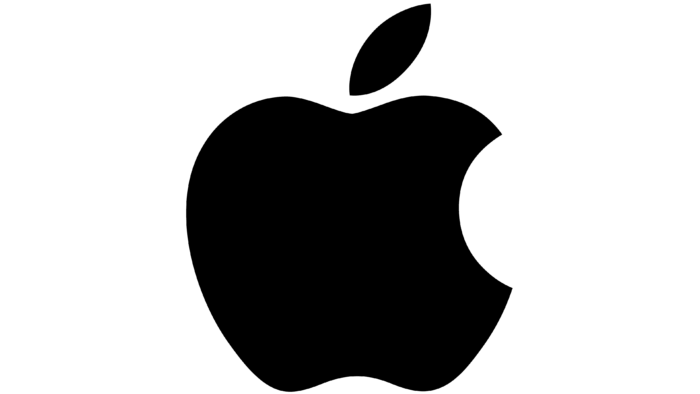